In [26]:
import numpy as np
from matplotlib import pyplot as plt

In [81]:
def simulate1(x0, dt, Tmax):
    x = np.empty(int(Tmax/dt))
    x[0] = x0
    for t in range(len(x)-1):
        dx = x[t]
        x[t+1] = dt * dx + x[t]
    return x

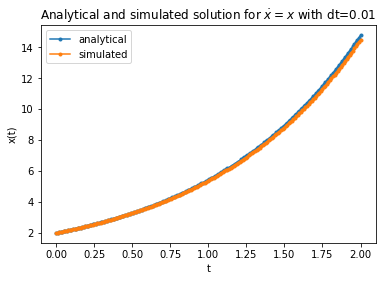

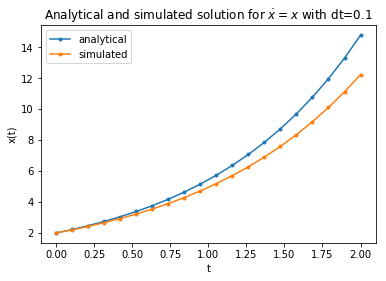

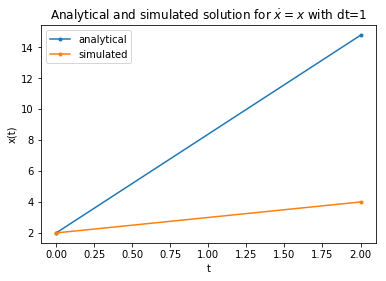

In [99]:
Tmax = 2
x0 = 2
for dt in (0.01, 0.1, 1):
    t_vec = np.linspace(0, Tmax, int(Tmax/dt))
    simulated_x = simulate1(x0, dt, Tmax)
    analytical_x = 2*np.exp(t_vec)
    plt.figure()
    plt.plot(t_vec, analytical_x, 'o-', markersize=3)
    plt.plot(t_vec, simulated_x, 'o-', markersize=3)
    plt.legend(['analytical', 'simulated'])
    plt.title(f'Analytical and simulated solution for $\dot x = x$ with dt={dt}')
    plt.xlabel('t')
    plt.ylabel('x(t)')
    plt.show()

In [83]:
def simulate2(x0, dt, Tmax):
    x = np.empty(int(Tmax/dt))
    x[0] = x0
    for t in range(len(x)-1):
        dx = x[t]-(x[t]**3)/3
        x[t+1] = dt * dx + x[t]
    return x

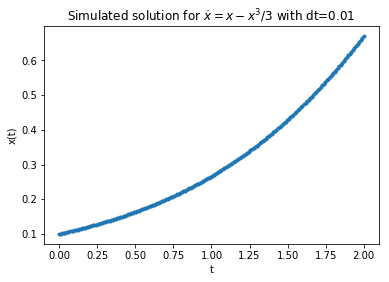

In [98]:
Tmax = 2
x0 = 0.1
dt = 0.01
t_vec = np.linspace(0, Tmax, int(Tmax/dt))
simulated_x = simulate2(x0, dt, Tmax)
plt.figure()
plt.plot(t_vec, simulated_x, 'o-', markersize=3)
plt.title(f'Simulated solution for $\dot x = x - x^3/3$ with dt={dt}')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.show()

In [150]:
def simulate3(x0, dt, Tmax, epsilon=0.01, a=0.7, b=0.8):
    x = np.empty((int(Tmax/dt), 2))
    I = np.zeros(int(Tmax/dt))
    I[0] = 0
    x[0, :] = x0
    for t in range(len(x)-1):
        dx = x[t, 0] - (x[t, 0]**3)/3 - x[t, 1] + I[t]
        dy = epsilon * (x[t, 0] + a - b * x[t, 1])
        #print(f't={t} x[t]={x[0,t]} y[t]={x[1, t]} I[t]={I[t]} dx={dx}')
        x[t+1, :] = (dt * dx + x[t, 0], dt * dy + x[t, 1])
    return x

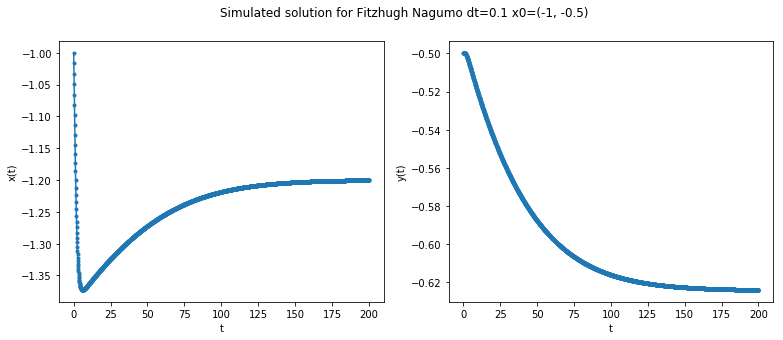

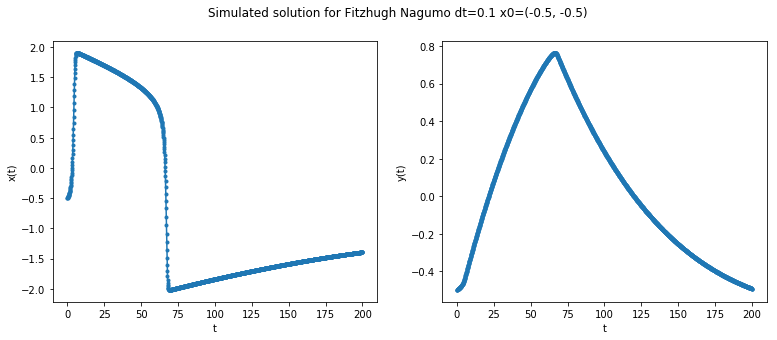

In [168]:
Tmax = 200
dt = 0.1
for x0 in ((-1, -0.5), (-0.5, -0.5)):
    t_vec = np.linspace(0, Tmax, int(Tmax/dt))
    simulated_x = simulate3(x0, dt, Tmax)
    fig = plt.figure(figsize=(12.8, 4.8))
    fig.suptitle(f'Simulated solution for Fitzhugh Nagumo dt={dt} x0={x0}')
    plt.subplot(121)
    plt.plot(t_vec, simulated_x[:, 0], 'o-', markersize=3)
    plt.xlabel('t')
    plt.ylabel('x(t)')
    plt.subplot(122)
    plt.plot(t_vec, simulated_x[:, 1], 'o-', markersize=3)
    plt.xlabel('t')
    plt.ylabel('y(t)')
    plt.show()